# Load the Iris datset and do 5-fold cross-validation

Classification with SplitVotingEnsemble...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
Accuracy,0.947±0.018
BA,0.947±0.018
Precision,0.952±0.016
Recall,0.947±0.018
MCC,0.923±0.026


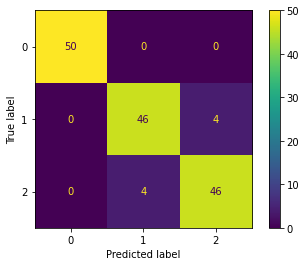

In [6]:
from icarlearn.ensemble.splitvotingens import SplitVotingEnsemble, SplitVotingEnsembleLGBM
from icarlearn.validation.crossvalidate import skfold_cv
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
myscorer = {'Accuracy'  :  (accuracy_score , {}),
             'BA'  :       (balanced_accuracy_score , {}),
             'Precision' : (precision_score, {'pos_label': 1, 'average':'macro'}),
             'Recall' :    (recall_score   , {'pos_label': 1, 'average':'macro'}),
             'MCC' :       (matthews_corrcoef, {}), 
            }
import pandas as pd
clf = RandomForestClassifier()
svclf = SplitVotingEnsemble(clf)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
Y = data['target']
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, scorer=myscorer, precision=3)
df_scores

# Load the kidney dataset

In [1]:
import pandas as pd
def pdread_csv_fromurl(url, sep=',', index_col=None):
    import pycurl
    from io import BytesIO
    crl_obj = pycurl.Curl()
    b_obj = BytesIO()
    crl_obj.setopt(crl_obj.URL, url)
    crl_obj.setopt(crl_obj.WRITEDATA, b_obj)
    crl_obj.perform()
    crl_obj.close()
    b_obj.seek(0)
    return pd.read_table(b_obj, sep=sep, index_col=index_col, encoding='utf-8')

Classification with SplitVotingEnsemble...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
ROC-AUC,0.9150±0.0079
Accuracy,0.8017±0.0039
BA,0.8296±0.0069
Specificity,0.7970±0.0039
Sensitivity,0.8622±0.0126
MCC,0.3924±0.0088


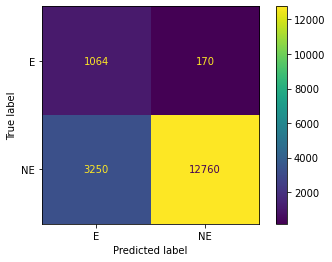

In [6]:
from icarlearn.ensemble.splitvotingens import SplitVotingEnsemble, SplitVotingEnsembleLGBM
from icarlearn.validation.crossvalidate import skfold_cv
from lightgbm import LGBMClassifier
from imblearn.metrics import specificity_score
from sklearn.metrics import *
import numpy as np
myscorer = { 'ROC-AUC':      (roc_auc_score, {'multi_class':'ovr', 'average':'macro'}),
             'Accuracy'  :   (accuracy_score , {}),
             'BA'  :         (balanced_accuracy_score , {}),
             'Specificity' : (specificity_score, {'pos_label': 'E'}),
             'Sensitivity' : (recall_score   , {'pos_label': 'E'}),
             'MCC' :         (matthews_corrcoef, {}), 
            }
clf = LGBMClassifier(n_estimators=200)
svclf = SplitVotingEnsemble(clf)
from sklearn.datasets import load_iris
data = load_iris()
X = pdread_csv_fromurl("https://zenodo.org/records/11917458/files/Brain_BIO.csv", index_col=0)
Y = pdread_csv_fromurl("https://zenodo.org/records/11917458/files/Brain_HELP.csv", index_col=0).replace({'aE': 'NE', 'sNE': 'NE'})
shdgenes = np.intersect1d(X.index.values, Y.index.values)
X = X.loc[shdgenes]
Y = Y.loc[shdgenes]
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, scorer=myscorer, precision=4)
df_scores